In [1]:
import torch
# saved = torch.load('./checkpoint/checkpoint_ERM_2.pt')

In [2]:
import pandas as pd
label = pd.read_table('../../data/ERM/label.dat.test',header=None)
label[3].value_counts()

3
0    844
1     66
Name: count, dtype: int64

### Load Record

In [3]:
import pandas as pd
import numpy as np
data = np.load('./save/loss_record.npz')

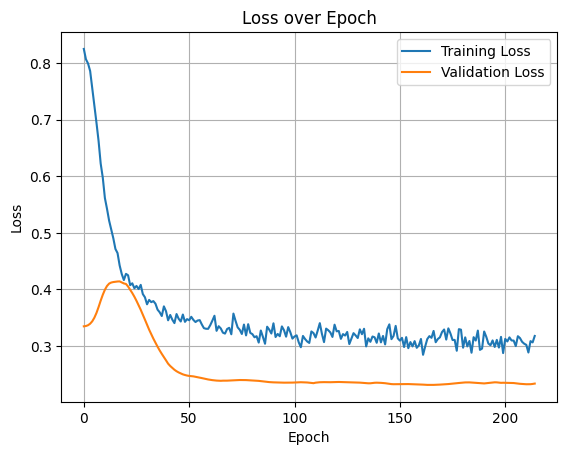

In [4]:
import matplotlib.pyplot as plt

plt.plot(data['train'], label='Training Loss')
plt.plot(data['val'], label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.title('Loss over Epoch')

# 显示图形
plt.show()


In [5]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

import numpy as np

# 读取预测结果和真实标签
label = np.load('./save/label.npz')
predict_onehot = label['predict']
groundtruth_onehot = label['val']

# 将one-hot编码的标签转换为0、1、2等标签形式
predict = np.argmax(predict_onehot, axis=1)
groundtruth = np.argmax(groundtruth_onehot, axis=1)


In [6]:
# 读取预测结果和真实标签
label = np.load('./save/label.npz')
predict_onehot = label['predict']
groundtruth_onehot = label['val']

# 将one-hot编码的标签转换为0、1、2等标签形式
predict = np.argmax(predict_onehot, axis=1)
groundtruth = np.argmax(groundtruth_onehot, axis=1)
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
report=classification_report(groundtruth, predict,output_dict=True,zero_division=0)
report = pd.DataFrame(report)
print(f"F1_Score : {report['1']['f1-score']}")

F1_Score : 0.9


In [7]:
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
target_names=['Gene','Gene;TF']
report=classification_report(groundtruth, predict,target_names=target_names,output_dict=True)
report = pd.DataFrame(report)
report

,Gene,Gene;TF,accuracy,macro avg,weighted avg
precision,0.985981,1.000000,0.986813,0.992991,0.986998
recall,1.000000,0.818182,0.986813,0.909091,0.986813
f1-score,0.992941,0.900000,0.986813,0.946471,0.986200
support,844.000000,66.000000,0.986813,910.000000,910.000000


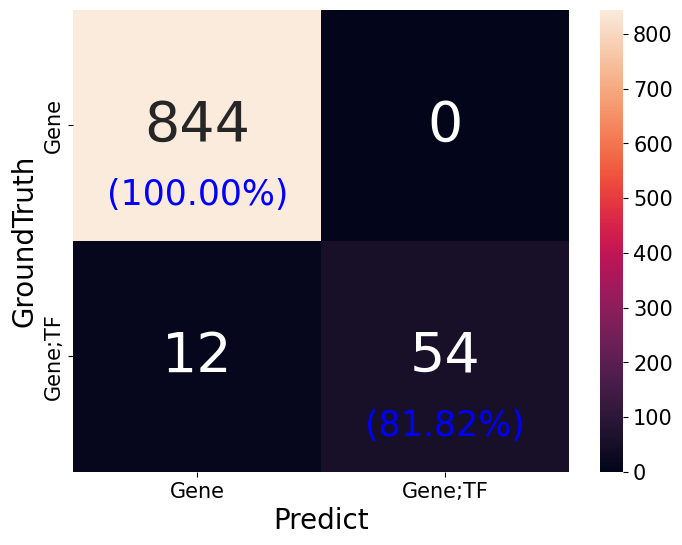

In [11]:
import numpy as np

# 计算混淆矩阵
cm = confusion_matrix(groundtruth, predict)

# 计算每个类别的正确比例
correct_ratios = np.diag(cm) / cm.sum(axis=1)
pd.DataFrame(report).to_csv("1.csv")
# 绘制混淆矩阵热图
ax = sns.heatmap(cm, annot=True, fmt='g', xticklabels=target_names, yticklabels=target_names, annot_kws={"fontsize":40})
ax.set_xlabel('Predict', size=20)
ax.set_ylabel('GroundTruth', size=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.gcf().set_size_inches(8, 6)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=15)

# 在热图上标出每个类别的正确比例
for i, label in enumerate(target_names):
    ax.annotate(f"({correct_ratios[i]:.2%})", xy=(i+0.5, i+0.8), ha="center", va="center", fontsize=25, color="blue")

plt.show()